## Figuring out Feature Importance

In [1]:
!pip install rfpimp

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [62]:
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_orig = pd.read_csv("/Users/siavashmortezavi/Downloads/rent.csv")

df = df_orig.copy()

In [63]:
df.head()

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1


In [64]:
# attentuate affect of outliers in price
df['price'] = np.log(df['price'])

df_train, df_test = train_test_split(df, test_size=0.20)

In [65]:
# features = ['bathrooms','bedrooms','longitude','latitude',
#             'price']
# df_train = df_train[features]
# df_test = df_test[features]

X_train, y_train = df_train.drop('price',axis=1), df_train['price']
X_test, y_test = df_test.drop('price',axis=1), df_test['price']

X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))


In [66]:
X_train.head()

,bathrooms,bedrooms,longitude,latitude,interest_level,random
41995,2.0,2,-73.9676,40.7951,1,0.802474
4775,1.0,1,-73.9781,40.7778,1,0.334093
45536,1.0,0,-74.0006,40.7383,1,0.956635
6177,1.0,2,-73.9618,40.7617,1,0.550529
41964,1.0,1,-73.9475,40.8225,1,0.689826


In [67]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
sorted(list(zip(X_train.columns,rf.feature_importances_)), key=lambda x:(x[1],x[0]))

[('interest_level', 0.02747540978846344),
 ('random', 0.04274856713028626),
 ('bedrooms', 0.11388926200891548),
 ('latitude', 0.154128201831231),
 ('longitude', 0.22427011344661402),
 ('bathrooms', 0.43748844579448976)]

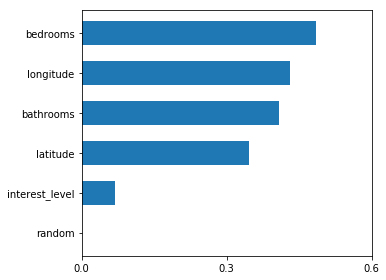

In [70]:
imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)

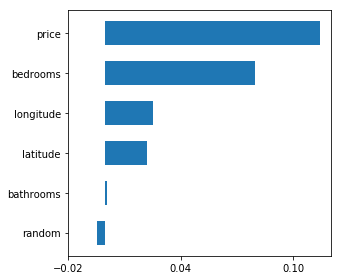

In [59]:
df_train, df_test = train_test_split(df_orig, test_size=0.20)
features = ['bathrooms','bedrooms','price','longitude','latitude',
            'interest_level']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('interest_level',axis=1), df_train['interest_level']
X_test, y_test = df_test.drop('interest_level',axis=1), df_test['interest_level']
# Add column of random numbers
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test)
viz = plot_importances(imp)

In [61]:
df.corr()

,bathrooms,bedrooms,price,longitude,latitude,interest_level
bathrooms,1.000000,0.533446,0.646049,0.010393,-0.009657,-0.082573
bedrooms,0.533446,1.000000,0.576157,0.006892,-0.004745,0.027293
price,0.646049,0.576157,1.000000,-0.004794,-0.007632,-0.252546
longitude,0.010393,0.006892,-0.004794,1.000000,-0.966807,-0.004752
latitude,-0.009657,-0.004745,-0.007632,-0.966807,1.000000,0.004804
interest_level,-0.082573,0.027293,-0.252546,-0.004752,0.004804,1.000000


## Logistic Regression

In [71]:
import numpy as np    
from sklearn.linear_model import LogisticRegression

x1 = np.random.randn(100)
x2 = 4*np.random.randn(100)
x3 = 0.5*np.random.randn(100)
y = (3 + x1 + x2 + x3 + 0.2*np.random.randn()) > 0
X = np.column_stack([x1, x2, x3])

In [80]:
np.std(X,axis=0)

array([0.95049919, 3.99198733, 0.47018581])

In [74]:
m = LogisticRegression()
m.fit(X, y)
# The estimated coefficients will all be around 1:
print(m.coef_)
# Those values, however, will show that the second parameter
# is more influential
print(np.std(X, 0)*m.coef_)

[[1.1648972  1.01986069 0.55840923]]
[[1.10723384 4.07127097 0.2625561 ]]


In [49]:
m.fit(X / np.std(X, 0), y)
print(m.coef_)

[[0.51730478 2.48076275 0.67725472]]
